# CNN(합성곱 신경망: Convolution Neural Network) 과 빌딩 연습

_아 많이왔다. 이제 진짜다. 시계열 복습을 위한 최종 단계에 이르렀다. CNN, RNN, Auto-Encoder, GAN 차례로 공부할 예정._

CNN은 합성곱 신경망이다. 합성곱이라는 연산을 사용하는 신경망이다. 특히 이미지 분류 작업에서 좋은 성능을 보여준다.

일부는 wiki를 참조하였다. : 

        https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D
        https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1

---

### 합성곱(convolution)

$$ y(i) = (x*w)(i)=\Sigma _{{k = -\infty }}^{\infty }x(k)w(i-k)$$

합성곱 연산은 i시점의 인풋 데이터 x값과 가중치 w값의 합성곱 연산의 결과는 y(i)와 같음을 나타낸다. k도 시점을 나타내는 상태인데, 가중치 w의 시점은 w(i)가 아니라, w(i-k)이다. 

이를 **플립(flip)**이라고 하며, 가중치의 시점을 뒤집는다는 뜻이다. 가중치는 **커널(kernel)**이라고도 부른다. 합성곱이라는 연산의 정의 자체가 가중치를 플립하는 연산이다.

위 식은 시점의 순서에 상관없이 결과가 동일하기 때문에 아래처럼 쓸 수 있다. (wiki에서 합성곱에 대하여 이야기할 때는 '적분'한다고 표현하며, 시그마 대신 인테그랄이 그려져있다.)

$$ y(i) = (x*w)(i)=\Sigma _{{k = -\infty }}^{\infty }x(i-k)w(k)$$

위의 두 식을 2차원 공간으로 넓힌다면 아래와 같은 식이 된다.

$$ Y(i,j) = (X*W)(i, j) = \Sigma _{{k_{1} = -\infty }}^{\infty } \Sigma _{{k_{2} = -\infty }}^{\infty } X(k_{1}, k_{2}) W(i-k_{1}, j-k_{2})$$

합성곱 연산은 시점의 순서에 상관없이 결과가 동일하므로 아래같은 표현도 성립한다. 

$$ Y(i,j) = (X*W)(i, j) = \Sigma _{{k_{1} = -\infty }}^{\infty } \Sigma _{{k_{2} = -\infty }}^{\infty } X(i-k_{1}, j-k_{2}) W(k_{1}, k_{2})$$

현실적으로는 앞의 연산보다 가중치, 즉 커널을 플립하지 않은 연산을 더 많이 사용한다. 아래와 같은 연산을 **cross-correlation**이라고 부른다.

$$ Y(i,j) = (X*W)(i, j) = \Sigma _{{k_{1} = -\infty }}^{\infty } \Sigma _{{k_{2} = -\infty }}^{\infty } X(i+k_{1}, j+k_{2}) W(k_{1}, k_{2})$$

주의할 점은 좌표를 계산할 때 0부터 계산한다. 행렬에서 1행 1열은 (0, 0) 좌표인 것이다.

입력 데이터와 합성곱 연산을 수행하게 되는 행렬을 커널이라고 부르는데, 이것이 가중치인 것이다.

4x4행렬과 2x2커널의 합성곱을 연산한 결과 3x3크기의 출력 데이터가 나온다. 즉, **합성곱 연산 결과 데이터의 차원이 줄어든다.**

**편향이 존재할 떄에는 입력 데이터와 커널을 합성곱 한 후 각 행렬 원소에 편향을 더하게 된다.**

### 패딩(padding)

신경망에 커널을 적용하면서, 층이 깊어질수록 데이터의 차원이 줄어들게 된다. 그렇게 차원이 줄어드는 현상을 방지하기 위해 패딩이라는 방법을 사용한다. 

말하자면 입력 데이터 행렬의 주변(첫 행, 열, 마지막 행, 열)에 0 같은 특정 값으로 채우는 것을 의미한다.

### 스트라이드(stride)

한 번 합성곱 연산한 후 다음 계산 영역을 선택할 때 얼마나 이동할지 간격을 정하는 값이다. 1이면 한 행(열)만 이동하고, 2면 두 행(열)을 이동하며 합성곱을 수행한다.

이때 스트라이드 2가되면 스트라이드1일 때보다 출력 데이터 행렬의 차원이 더 작아진다.

패딩과 스트라이드 관련하여 출력 데이터의 크기를 미리 계산해볼 수 있다. 
$$ 합성곱 결과 행(열) = \frac { 입력 행렬 행(열) 크기 - 커널 차원 행(열) 크기 + 2 \times 패딩 차원 행(열) 크기 } { 스트라이드 차원 행(열) 크기 } + 1$$


### 풀링(pooling)
데이터의 차원을 줄이는 방법이다. 풀링에는 여러 종류가 있는데, 맥스 풀링을 사용하면 이렇다. (행렬 인덱스를 가정하고 적어본다.)

예시로 4x4 입력 행렬에서 스트라이드 2인 경우를 가정하고 맥스풀링을 적용하면, 2x2 크기의 [0,0]~[1,1] 에서 MAX 값이 출력값 [0,0] 이 된다.

그리고 [0,2] ~ [1,3]에서 가장 큰 값이 출력값 [0,1], 그리고 [2,0] ~ [3,1]에서 가장 큰 값이 출력값 [1,0], 그리고 [2,2] ~ [3,3]에서 가장 큰 값이 출력값[1,1]이 된다.


## 텐서(고차원)에서의 합성곱

보통의 입력 데이터는 너비(width)와 높이(height) 뿐만 아니라 채널(channel)도 고려한다. 이미지 데이터의 경우 하나의 픽셀값에 대해 RGB 각 세가지 값이 있다. 다시 말해, 한 이미지가 행렬로 존재할 때 한 픽셀(한 원소)값은 (R, G, B)식으로 3차원으로 나타난다. 

입력 데이터가 고차원이므로 커널도 채널 수만큼 필요하다.

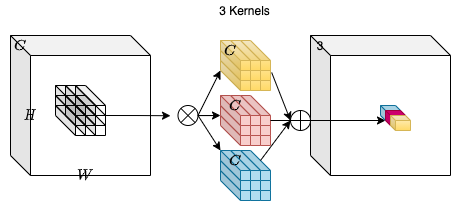 
출처: https://keras.io/examples/vision/involution/

위 이미지는 커널 수가 여러개인 경우를 나타낸다. 커널 수가 많아지는 경우 출력 데이터의 채널 수가 커널 수 만큼 많아진다.

만약 편향이 존재한다면 편향은 초반의 예시처럼 한 scalar값이 아니라 (채널 수 길이의) vector가 될 것이다. 

차원이 커질 수록 for문을 많이 쓰면서 연산을 수행하는 장비에 무리가 갈 수 있다. 그렇기에 고차원 데이터를 합성곱 할 때는 2차원 평면으로 변형해서 표현하기도 한다.

고차원 커널도 2차원 행렬로 표현이 가능하다. 즉 텐서x텐서가 행렬x벡터의 형태로 단순하게 바뀌는 것이다.

만약 커널 수가 늘어나면, 연산해야할 벡터의 개수가 늘어나는 것이다. 행렬x벡터1, 행렬x벡터2 식이 된다.





In [ ]:
# 모형 저장 및 불러오는 코드

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
import keras

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0
